In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
data=load_iris()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target,columns=["target"])

In [4]:
df=pd.concat([x,y],axis=1)

In [5]:
x=df.drop("target",axis=1)
y=df["target"]

In [6]:
from feature_selector import FeatureSelector

In [7]:
fs=FeatureSelector(x,y)

# for check missing value 70 % above

In [8]:
fs.identify_missing(missing_threshold=0.7)

0 features with greater than 0.70 missing values.



# remove missing value

In [9]:
missing_feature=fs.ops["missing"]
missing_feature


[]

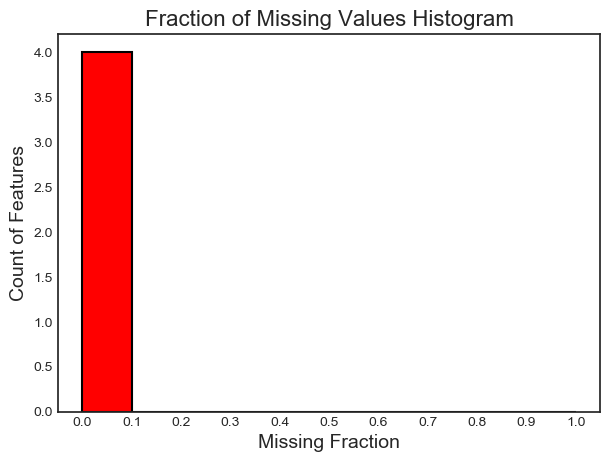

In [10]:
fs.plot_missing()

# for check highly collinear

In [11]:
fs.identify_collinear(correlation_threshold=0.98)

0 features with a correlation magnitude greater than 0.98.



# remove highly correlated feature

In [12]:
fs.ops["collinear"]

[]

In [13]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value


# running all method at ones

In [14]:
fs.identify_all(selection_params={"missing_threshold":0.6,
                                 "correlation_threshold":0.98,
                                  "task":"classification",
                                  "cumulative_importance":0.99,
                                 "eval_metric":"auc"})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.0394737
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration

In [15]:
x_train=fs.remove(methods="all",keep_one_hot=False)

['missing', 'collinear', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 1 features including one-hot features.


In [16]:
x_train

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
5,5.4,1.7,0.4
6,4.6,1.4,0.3
7,5.0,1.5,0.2
8,4.4,1.4,0.2
9,4.9,1.5,0.1


# univariant feature selection

In [17]:
from sklearn.feature_selection import SelectKBest,chi2

In [37]:
s=SelectKBest(chi2,k=3)

In [38]:
s.fit_transform(x,y)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [ ]:
ss

# from extratreeclassifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
ext=ExtraTreesClassifier()

In [36]:
ext.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
print(ext.feature_importances_)

[0.06293062 0.03974113 0.450241   0.44708726]


In [35]:
pd.Series(ext.feature_importances_,index=x.columns)

sepal length (cm)    0.062931
sepal width (cm)     0.039741
petal length (cm)    0.450241
petal width (cm)     0.447087
dtype: float64